
# ASSIGNED A draining tank



If you have a cylindrical tank that drains through a hole in the bottom, the height of the water inside the cylinder is governed by:

$\frac{dh}{dt} = - \frac{A_h}{A_w} \sqrt{2 g h}$

Where $A_w$ is the cross-sectional area of the cylinder, $A_h$ is the area of the hole in the bottom, and $g = 32$ ft/s<sup>2</sup>. Suppose the water starts at a height of 10 ft in a cylinder with a radius of 2 ft. There is a hole in the bottom with a radius of 1/2 inch.

Use `scipy.integrate.solve_ivp` to estimate how long it will take to drain the tank. Make a plot that shows the height as a function of time.

Note that you have to some care in selecting the integration range here; if $h$ is ever negative then you will see some warnings about invalid values in the sqrt.




## solution


If we don't take some care to handle negative values in the square root, we cannot get to h=0, but we can get pretty close, e.g. 1e-12 ft. We can agree that is basically empty.

We can use an event to find the solution, and the event of interest is where the height is equal to the small number we choose, e.g. $h - 1e-12 = 0$. We want the integration to terminate at this point, so we set `event.terminal = True` in the code.



The tank is practically empty at tevents: [ 1821.5] seconds.


/Users/jkitchin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/Users/jkitchin/anaconda/lib/python3.6/site-packages/scipy/integrate/_ivp/rk.py:140: RuntimeWarning: invalid value encountered in maximum
  scale = atol + np.maximum(np.abs(y), np.abs(y_new)) * rtol


'A termination event occurred.'

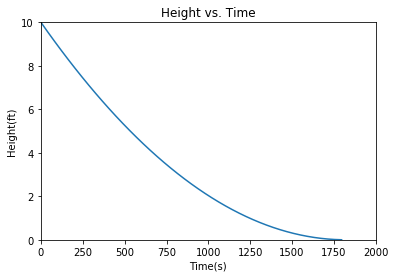

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

Aw = np.pi * 2**2  # ft^2
Ah = np.pi * (0.5 / 12)**2  # ft^2
g = 32  # ft / s^2


def dhdt(t, h):
    return -Ah / Aw * np.sqrt(2 * g * h)

def event(t, h):
    return h - 1e-12

event.terminal = True

h0 = np.array([10])  # starting height at t=0
tspan=(0, 2000)
tval = np.linspace(*tspan)

sol = solve_ivp(dhdt, tspan, h0, t_eval=tval, events=event)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y.T)

plt.xlim([0, 2000])
plt.ylim([0, 10])
plt.xlabel('Time(s)')
plt.ylabel('Height(ft)')
plt.title('Height vs. Time')
print(f'The tank is practically empty at tevents: {np.round(sol.t_events[0], 1)} seconds.')
sol.message

The RuntimeWarning above is caused by the solver making estimates of h that turn out to be negative. This doesn't affect the solution, but it is annoying to see. The issue is our ode function is only correct for h >=0. For all other h, the derivative should just be 0.


There is an analytical solution to this problem (you were not required to derive it), which is the time required to drain the tank is given by:

In [1]:
Aw / (4 * Ah) * np.sqrt(10)

1821.4719322569865

The main advantage of the analytical solution is you simply evaluate it in one one of code. The real work is getting to the analytical solution, and making sure it is correct.

Some of you had an idea to eliminate the RuntimeWarning by redefining the ODE as $h' = Ah / Aw * ((2 * g * h)**2)**0.25$. This is algebraically equivalent, but as $h$ goes to zero, you may run into some numerical issues, e.g. (1e-9)\*\*2 is 1e-18, which is *very* small. That means we will need need extra care with the tolerances that define the accuracy of the solution. Here is a solution that increases the accuracy of the solution to get something pretty close to the previous result. Depending on which version of scipy you have installed, you may, however, that we get a new RuntimeWarning, so it doesn't really help. There is not one here because I installed a newer version of scipy than the one that gets initially installed in anaconda.



The tank is practically empty at tevents: [ 1821.47084038] seconds.


'A termination event occurred.'

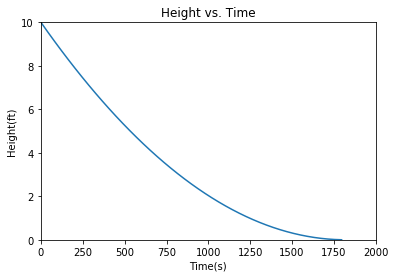

In [7]:
import numpy as np
from scipy.integrate import solve_ivp

Aw = np.pi * 2**2
Ah = np.pi * (0.5 / 12)**2
g = 32  # ft / s^2

def dhdt(t, h):
    return -Ah / Aw * ((2 * g * h)**2)**0.25

def event(t, h):
    return h - 1e-12

event.terminal = True

h0 = np.array([10])
tspan=(0, 2000)
tval = np.linspace(*tspan)

sol = solve_ivp(dhdt, tspan, h0, t_eval=tval, events=event, rtol=1e-12, atol=1e-12)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y.T)

plt.xlim([0, 2000])
plt.ylim([0, 10])
plt.xlabel('Time(s)')
plt.ylabel('Height(ft)')
plt.title('Height vs. Time')
print(f'The tank is practically empty at tevents: {sol.t_events[0]} seconds.')
sol.message

# General Comments

For presentation, please make sure every sentence has the appropriate capitalization and punctuation. Also, the plots should be labeled appropriately. 

Regarding the comments for codes, it is unnecessary to comment every single line of the codes since many of them are self-explanatory. Comments are necessary for units, unit conversion and some important equations or functions.